**Overview**


On this notebook, we have used **9** different Machine Learning Approaches nameley **MultinomialNB, DecisionTreeClassifier, LinearSVC, AdaBoostClassifier, 
          BaggingClassifier,RandomForestClassifier,
         LogisticRegression, SGDClassifier, KNeighborsClassifier** to classify the **network_impactimpact of Cyberbullying** across the social media contents. And used LSTM as a Deep Learning Approach. For the dataset, we have used data from **2** different sources. The **first** one is from  "https://github.com/Kavita309/network_impact-of-cyberbullying-across-SMPs/tree/master/DataSets/CSV" and the **second** one is from "https://github.com/Mrezvan94/Harassment-Corpus" they have provided the data upon request. The number of instances are **27817**. There are total **4 classes** of data depending on the network_impact. The classes are **"High", "Medium", "Low" and "None".** We have concatenated the data from these sources and preprocessed them accordingly. 

Code Reference: https://github.com/dhavalpotdar/cyberbullying-detection

**Relevant Links for LSTM:**


https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35

https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

**Relevant Links for Machine learning algorithms:**


https://monkeylearn.com/text-classification/


https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a


https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/


https://lionbridge.ai/articles/12-best-text-classification-tools-and-services/


## **Detecting Cyberbullying network_impact** 

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading and Analyzing the data**




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/custom_augmented_train.csv')

In [ ]:
df.shape

(199674, 4)

In [ ]:
df.head()
#df.drop('Unnamed: 0', inplace=True, axis=1)
df.dtypes

_headline         object
_description      object
network_impact    object
data_type         object
dtype: object

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.sample(frac = 1) 

In [ ]:
df.head()

,_headline,_description,network_impact,data_type
14896,wo had over come China to the UK?,wo review prelaoding for catherines gige wo lo...,Threatened,augmented
192402,guelph pgpg cmts glphm cmts,guelph pgpg cmts glphm cmts currentdsd nsg r...,Outage,original
20539,ec rtn code deployment gap tool brt ebrt,code version application change based code tes...,Threatened,original
79445,cutover cable node,cutover cable node,Degraded,original
27892,ss migration nortel stp tek stp mwi trial ess,trial mwi service ss migration toronto esss mw...,Threatened,original


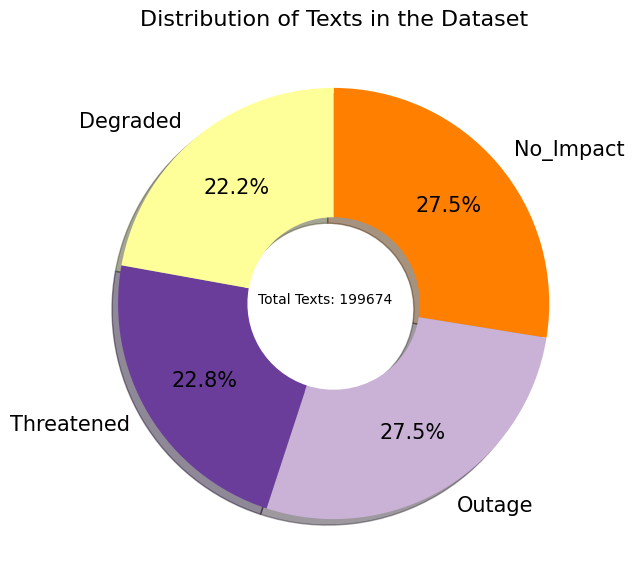

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['network_impact'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Texts: {}'.format(df.shape[0]))
plt.title('Distribution of Texts in the Dataset', fontsize = 16);

In [ ]:
df['network_impact'] = df.network_impact.map({'Threatened':1,'Degraded':2,"Outage":3,"No_Impact":0})

In [ ]:
df.shape

(199674, 4)

In [ ]:
df.isna().sum()

_headline         0
_description      0
network_impact    0
data_type         0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(158141, 4)

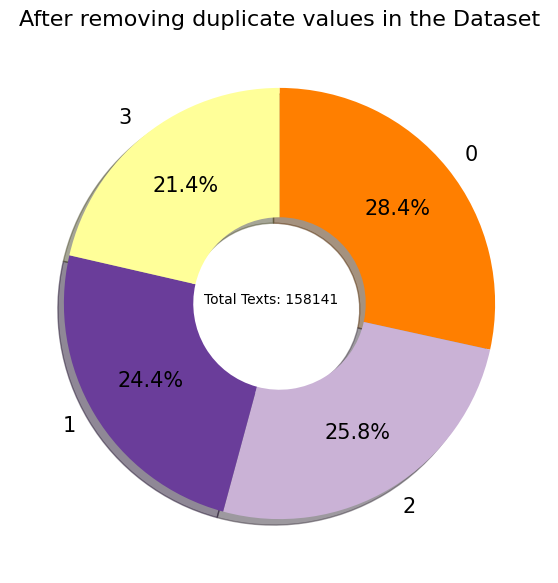

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['network_impact'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Texts: {}'.format(df.shape[0]))
plt.title('After removing duplicate values in the Dataset', fontsize = 16);

# **Implementing a training and predicting Pipeline**

---



In [ ]:
df['_description'] = df['_headline'] + ' ' + df['_description']

In [ ]:
df.head()

,_headline,_description,network_impact,data_type
14896,wo had over come China to the UK?,wo had over come China to the UK? wo review pr...,1,augmented
192402,guelph pgpg cmts glphm cmts,guelph pgpg cmts glphm cmts guelph pgpg cm...,3,original
20539,ec rtn code deployment gap tool brt ebrt,ec rtn code deployment gap tool brt ebrt co...,1,original
79445,cutover cable node,cutover cable node cutover cable node,2,original
27892,ss migration nortel stp tek stp mwi trial ess,ss migration nortel stp tek stp mwi trial e...,1,original


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['_description'], 
                                                    df['network_impact'], 
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 158141
Number of rows in the training set: 118605
Number of rows in the test set: 39536


tfidf


In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english', lowercase=True)

In [ ]:
training_data = tfidf_vector.fit_transform(X_train)

In [ ]:
testing_data = tfidf_vector.transform(X_test)

In [ ]:
df.head()

,_headline,_description,network_impact,data_type
14896,wo had over come China to the UK?,wo had over come China to the UK? wo review pr...,1,augmented
192402,guelph pgpg cmts glphm cmts,guelph pgpg cmts glphm cmts guelph pgpg cm...,3,original
20539,ec rtn code deployment gap tool brt ebrt,ec rtn code deployment gap tool brt ebrt co...,1,original
79445,cutover cable node,cutover cable node cutover cable node,2,original
27892,ss migration nortel stp tek stp mwi trial ess,ss migration nortel stp tek stp mwi trial e...,1,original


In [ ]:
#Defining the pipeline function 

def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test, average='macro')

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train,average='macro')

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test,average='macro')

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train,average='macro')

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test,average='macro')

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train,average='macro')

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results


## **Put Algorithms in Pipeline** 

In [ ]:
# making a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          BaggingClassifier(),RandomForestClassifier(),
         LogisticRegression(max_iter=1000), SGDClassifier(), KNeighborsClassifier()]
         #

In [ ]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training MultinomialNB
Training MultinomialNB finished in 0.05 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 119.06 sec
----------------------------------------------------
Training LinearSVC
Training LinearSVC finished in 3.66 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 18.49 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 984.65 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 957.42 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 69.42 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.76 sec
-----------------------------

In [ ]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)


## **Analyze the results of the Pipeline**




In [ ]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,RandomForestClassifier,0.812272,0.817451,0.807935,0.810621,17.686466,0.997091,0.997020,0.997023,0.997021,957.419470
1,LinearSVC,0.794314,0.792579,0.792381,0.792314,0.024491,0.915796,0.915074,0.914995,0.914969,3.661971
2,LogisticRegression,0.782325,0.781621,0.779641,0.780322,0.040909,0.851279,0.850756,0.849646,0.850019,69.423139
3,BaggingClassifier,0.755817,0.759437,0.752626,0.754964,1.799944,0.984292,0.984725,0.983793,0.984237,984.648367
4,SGDClassifier,0.742159,0.743490,0.736852,0.736201,0.027199,0.769344,0.771877,0.764880,0.764213,0.758796
5,MultinomialNB,0.737707,0.742751,0.731654,0.734723,0.027025,0.789882,0.795394,0.784801,0.787953,0.049843
6,DecisionTreeClassifier,0.720609,0.721825,0.719575,0.720592,0.241560,0.997100,0.997223,0.996848,0.997032,119.064635
7,KNeighborsClassifier,0.603754,0.755914,0.602003,0.609589,7610.905566,0.662072,0.801903,0.661279,0.672649,0.014235
8,AdaBoostClassifier,0.522865,0.557582,0.521550,0.518940,1.497534,0.525897,0.562839,0.525566,0.522696,18.492162


In [ ]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.522865,0.557582,0.521550,0.518940,0.024491,0.525897,0.562839,0.525566,0.522696,0.014235
max,0.812272,0.817451,0.807935,0.810621,7610.905566,0.997100,0.997223,0.997023,0.997032,984.648367


In [ ]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

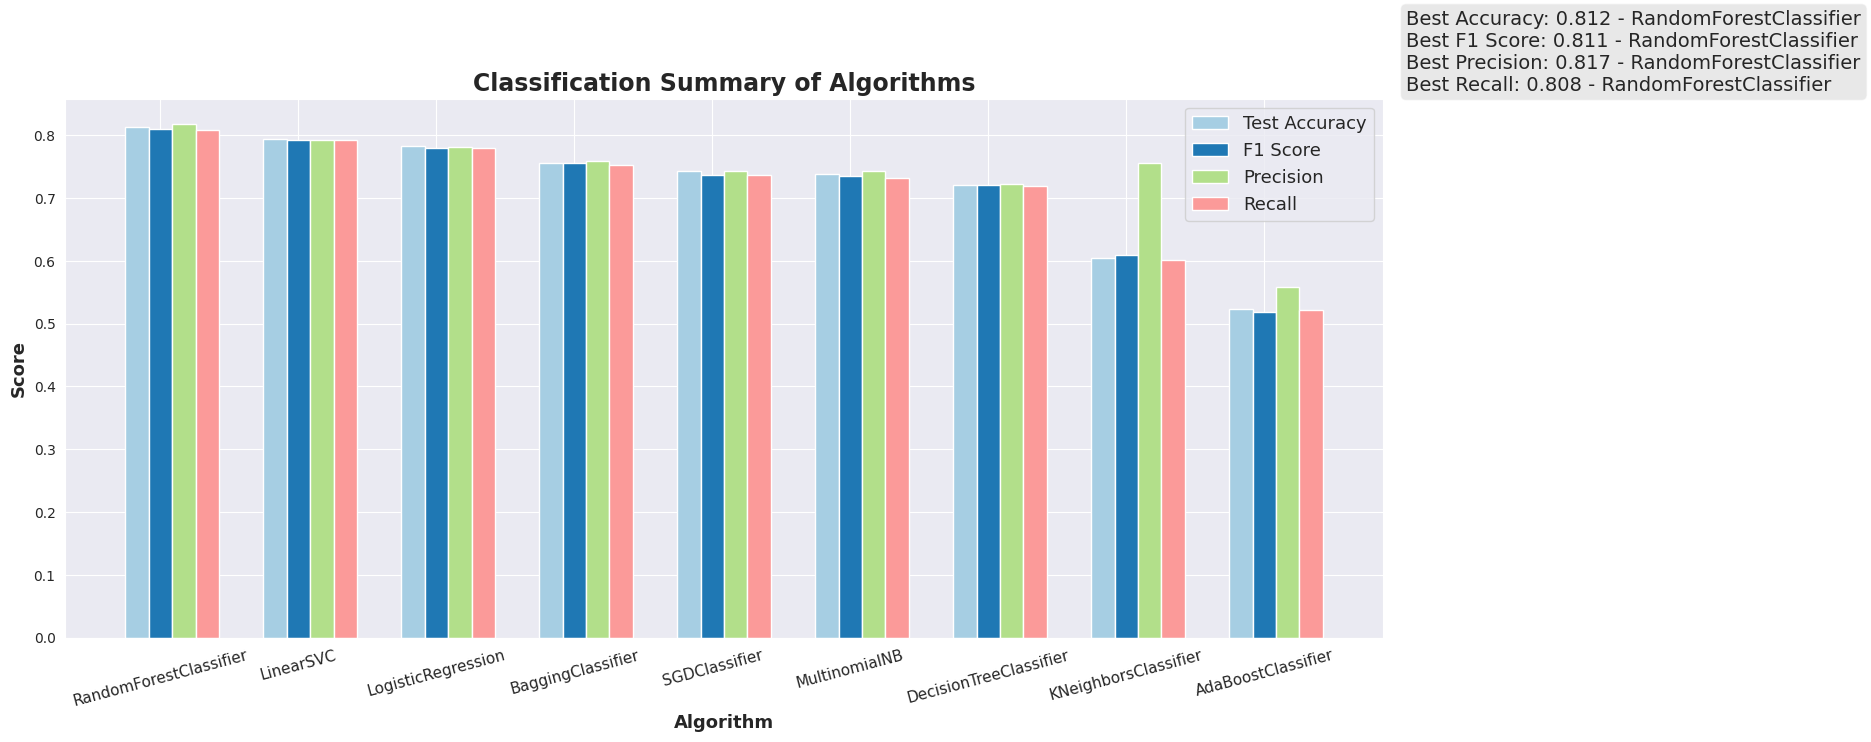

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette("Paired")
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);


In [ ]:

# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

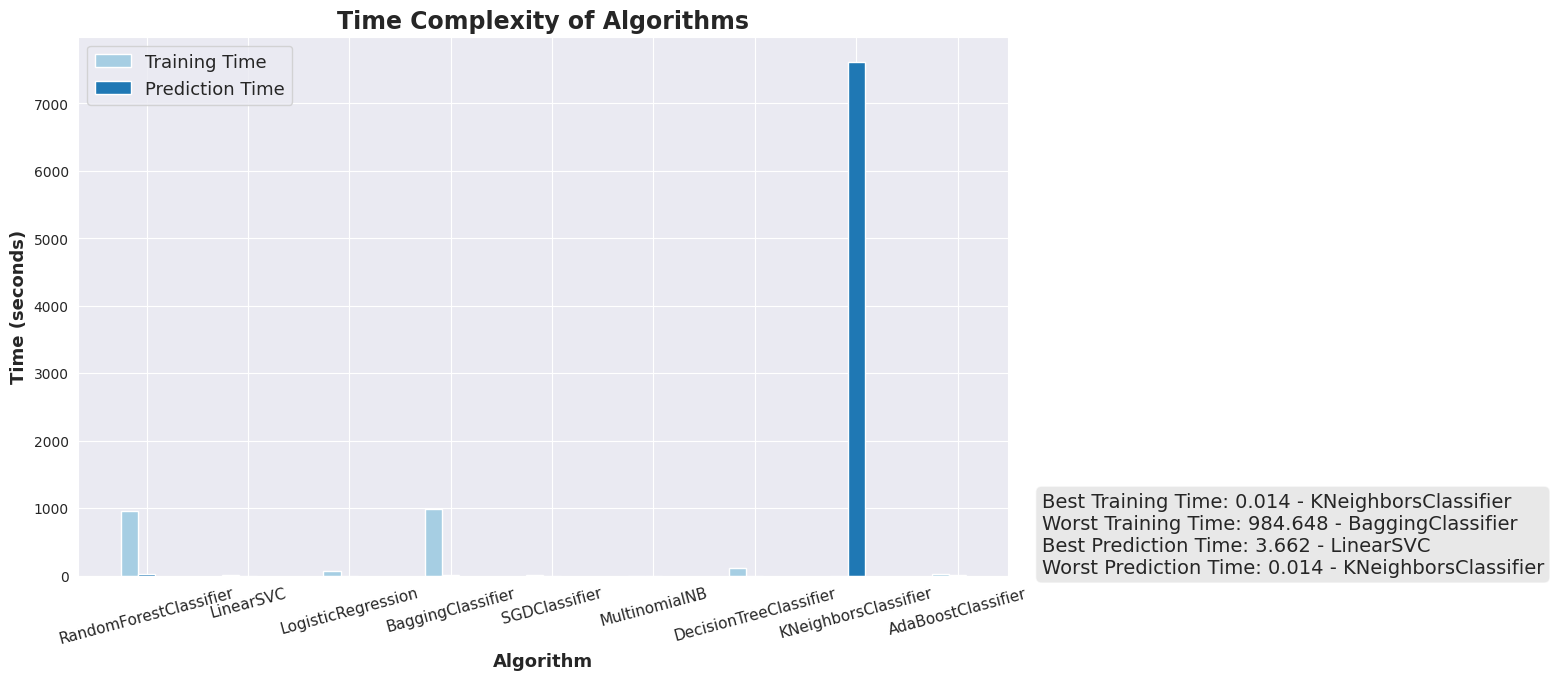

In [ ]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

The Algorithms Bagging, SGD, Logistic Regression and Decision Tree ,Random Forest and LinearSVC have more or less similar performance. We will tune the hyperparameters of these algorithms. However, the training time for Random Forest and  Bagging is very high as compared to the others.

## **Conclusion**

We found Random Forest to be the best suited model for our data. We achieved the following performance parameters:



1.  **Accuracy**:86.59%
2.  **F1-score**: 85.59%
3.  **Precision**: 85.57%
4.  **Recall**: 86.28%



Implementing Deep Learning Approach

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
from sklearn import preprocessing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
##Process the Data
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 4)                 1028  

In [ ]:
history=model.fit(sequences_matrix,y_train,batch_size=256,epochs=25,
          validation_split=0.2)

Epoch 1/25
380/380 [==============================] - 12s 13ms/step - loss: 0.8170 - accuracy: 0.6826 - val_loss: 0.6989 - val_accuracy: 0.7318
Epoch 2/25
380/380 [==============================] - 5s 13ms/step - loss: 0.6797 - accuracy: 0.7406 - val_loss: 0.6700 - val_accuracy: 0.7441
Epoch 3/25
380/380 [==============================] - 4s 12ms/step - loss: 0.6476 - accuracy: 0.7535 - val_loss: 0.6527 - val_accuracy: 0.7461
Epoch 4/25
380/380 [==============================] - 4s 11ms/step - loss: 0.6324 - accuracy: 0.7605 - val_loss: 0.6430 - val_accuracy: 0.7531
Epoch 5/25
380/380 [==============================] - 5s 12ms/step - loss: 0.6097 - accuracy: 0.7690 - val_loss: 0.6311 - val_accuracy: 0.7581
Epoch 6/25
380/380 [==============================] - 4s 12ms/step - loss: 0.5956 - accuracy: 0.7731 - val_loss: 0.6249 - val_accuracy: 0.7599
Epoch 7/25
380/380 [==============================] - 4s 12ms/step - loss: 0.5831 - accuracy: 0.7777 - val_loss: 0.6201 - val_accuracy: 0.764

In [ ]:
history= model.fit(sequences_matrix,y_train,batch_size=128,epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/100
760/760 [==============================] - 9s 12ms/step - loss: 0.4572 - accuracy: 0.8270 - val_loss: 0.6227 - val_accuracy: 0.7783
Epoch 2/100
760/760 [==============================] - 8s 10ms/step - loss: 0.4524 - accuracy: 0.8289 - val_loss: 0.6251 - val_accuracy: 0.7806


In [ ]:
#Process the test set data.

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix =pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#Evaluate the model on the test set.

accr = model.evaluate(test_sequences_matrix,y_test)

1267/1267 [==============================] - 6s 5ms/step - loss: 0.6174 - accuracy: 0.7838


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.617
  Accuracy: 0.784


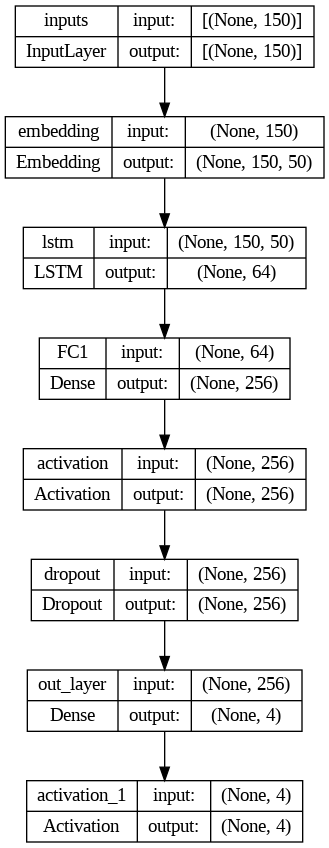

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='RNN.png', show_shapes=True, show_layer_names=True)

In [ ]:

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

import keras
from keras.optimizers import Adam
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])


history= model.fit(sequences_matrix,y_train,batch_size=128,epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.1)])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 4)                 1028

In [ ]:
#Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

#Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1267/1267 [==============================] - 7s 6ms/step - loss: 0.6437 - accuracy: 0.7537
Test set
  Loss: 0.644
  Accuracy: 0.754


**With ADAM optimizer and different learning reate, we were able to increase the accuracy to 85.7% **

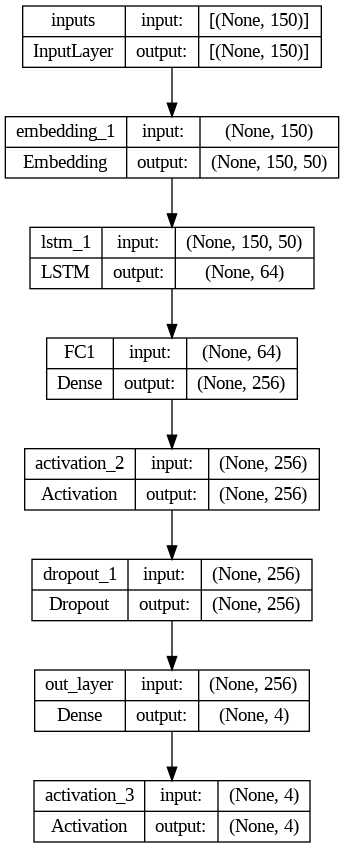

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='RNN.png', show_shapes=True, show_layer_names=True)

For the **LSTM** approach, we have tried **two different** optimizer and learning rate.** Adam **performed better than the **RMSProp**. We have used **sparse_categorical_crossentropy**in both experiments. The accuracy significantly improved from **82.3% to 85.7%**

Trying with Subjectivity and Polarity with the data and visualization

In [ ]:

import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:

# Clean the text 

# Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # Removed @
    text = re.sub(r'#', '', text) #Removed #tags
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\s', '', text) #removing hyperlinks
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'_', '', text) #remoed _
    text = re.sub(r'https', '', text)
    text = re.sub(r't', '', text)
    text = re.sub(r'co', '', text)

    return text

In [ ]:
df["_description"] = df["_description"].apply(cleanTxt)

In [ ]:

data = pd.DataFrame(df["_description"])
data

,_description
83677,np icke number reques caegory wireline ype rcm...
85027,w apnc
151186,non service affecing sofware upgrade following...
111818,equipmen upgrade
105331,cae cabling bill flood york s london
...,...
54431,insallaion ax mdu
204095,remove replace pors needed filer
19876,replace ransmier
196105,pwo review pre load provision mw radio rosebu...


In [ ]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["_description"].apply(getSubjectivity)
data["Polarity"] = data["_description"].apply(getPolarity)

data.head(15)

,_description,Subjectivity,Polarity
83677,np icke number reques caegory wireline ype rcm...,0.000000,0.000000
85027,w apnc,0.000000,0.000000
151186,non service affecing sofware upgrade following...,0.100000,0.000000
111818,equipmen upgrade,0.000000,0.000000
105331,cae cabling bill flood york s london,0.000000,0.000000
183542,aciviy replace eol mrv oob erminal servers wes...,0.000000,0.000000
153132,rpas x lug crs chassis mini bdfb bay pos ...,0.000000,0.000000
129224,rbs wiring fiber insall icke ver neville slaer...,0.000000,0.000000
194961,chello fred eln ran issue nigh change nrol cli...,0.666667,0.216667
70407,noe new srxfw a nafw ap es cases power ap pre ...,0.512987,0.068182


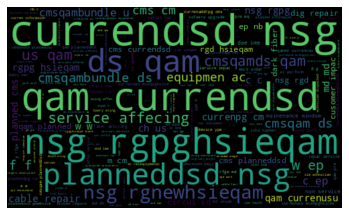

In [ ]:

# plot Wordcloud / TextCloud

allwords = ' '.join([twts for twts in data["_description"]])
wordCloud = WordCloud(width= 500, height=300, random_state=42, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

# Create a function to compute the Sentiment

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head()

,_description,Subjectivity,Polarity,Analysis
83677,np icke number reques caegory wireline ype rcm...,0.0,0.0,Neutral
85027,w apnc,0.0,0.0,Neutral
151186,non service affecing sofware upgrade following...,0.1,0.0,Neutral
111818,equipmen upgrade,0.0,0.0,Neutral
105331,cae cabling bill flood york s london,0.0,0.0,Neutral


In [ ]:

#Show the value content

data["Analysis"].value_counts()

Neutral     113256
Positive     37567
Negative     11244
Name: Analysis, dtype: int64

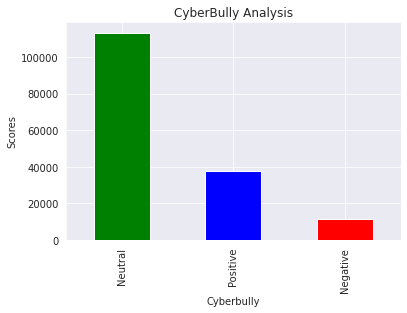

In [ ]:

#Plot and visualize the counts
plt.title("CyberBully Analysis")
plt.xlabel("Cyberbully")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="bar", color=['green', 'blue', 'red'])
plt.show()
